In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import timeit
from scipy.stats import shapiro
import re

In [2]:

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
%matplotlib inline

In [3]:
df_air = pd.read_csv('AIR_POLLUTION.csv', engine = 'python')

In [4]:
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df_air.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [7]:
df_air.tail()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58
365,2020-06-30,6.0,0.039,0.009,0.3,0.002,20.60,5.60,4.00,50,92.0,983.8,0.0,10.00


In [8]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


# 결측치가 있는 것을 확인할 수 있다

In [9]:
df_weihai = pd.read_csv('weihai-air-quality.csv', engine= 'python')

In [10]:
df_weihai.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,62,,,,,
1,2021/2/1,135,35,31,5,2,
2,2021/2/2,61,60,33,9,3,
3,2021/2/3,102,55,34,8,2,
4,2021/2/4,102,62,39,9,2,


In [11]:
df_weihai.tail(10)

,date,pm25,pm10,o3,no2,so2,co
2599,2014/3/29,123,119,116,19,18,11
2600,2014/3/30,175,138,105,39,24,16
2601,2014/3/31,220,68,60,23,9,2
2602,2020/3/31,,53,34,6,2,
2603,2019/12/31,,57,21,16,5,
2604,2018/12/31,,44,24,12,6,
2605,2017/9/10,,41,75,9,5,3
2606,2016/1/3,,37,26,23,8,4
2607,2014/12/31,,22,,6,8,
2608,2013/12/31,,116,46,30,37,11


In [12]:
def change_format(val):
    temp = val.split(sep='/')
    for element in range(len(temp)):
        if len(temp[element]) == 1:
            temp[element] = '0' + temp[element]
    return str(temp[0]) + '-' + str(temp[1]) + '-' + str(temp[2])

In [13]:
df_weihai['date'] = df_weihai['date'].apply(change_format)

## 중국 미세먼지 데이터로는 한국과 가장 가까운 Weihai 지역의 데이터를 사용했다(출처 : https://aqicn.org/city/weihai/).

## df_air DataFrame과 결합은 날짜 데이터를 key로 하여 진행 예정으로 형식 통일 과정 진행

In [14]:
df_weihai_join = df_weihai[['date',' pm10']]

In [15]:
df_weihai_join

,date,pm10
0,2021-03-01,
1,2021-02-01,35
2,2021-02-02,60
3,2021-02-03,55
4,2021-02-04,62
...,...,...
2604,2018-12-31,44
2605,2017-09-10,41
2606,2016-01-03,37
2607,2014-12-31,22


In [16]:
df_weihai_join.tail()

,date,pm10
2604,2018-12-31,44
2605,2017-09-10,41
2606,2016-01-03,37
2607,2014-12-31,22
2608,2013-12-31,116


In [17]:
df_weihai_join.rename(columns = {'date' :'MeasDate'}, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
df_weihai_join

,MeasDate,pm10
0,2021-03-01,
1,2021-02-01,35
2,2021-02-02,60
3,2021-02-03,55
4,2021-02-04,62
...,...,...
2604,2018-12-31,44
2605,2017-09-10,41
2606,2016-01-03,37
2607,2014-12-31,22


In [ ]:
df_air_raw = pd.merge(df_air, df_weihai_join, on = ['MeasDate'])

# df_air 과 df_weihai_join 데이터 통합(기존 자료에 중국 미세먼지 자료 추가)

In [20]:
df_air_raw.head(50)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,pm10
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,35
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,38
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,50
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,58
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,43
5,2019-07-06,29.0,0.043,0.032,0.5,0.003,29.87,0.00,1.54,80,39.7,993.7,0.0,3.50,39
6,2019-07-07,16.0,0.043,0.014,0.3,0.002,26.86,0.00,2.27,83,43.5,997.5,0.0,6.58,41
7,2019-07-08,10.0,0.035,0.019,0.3,0.002,25.13,0.00,1.96,76,45.3,997.9,0.0,6.58,36
8,2019-07-09,10.0,0.033,0.019,0.4,0.002,25.11,0.00,1.84,81,46.3,996.7,0.0,4.42,25
9,2019-07-10,9.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,0.0,8.29,25


In [21]:
df_air_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   364 non-null    object 
 1   PM10       363 non-null    float64
 2   O3         363 non-null    float64
 3   NO2        363 non-null    float64
 4   CO         309 non-null    float64
 5   SO2        363 non-null    float64
 6   TEMP       364 non-null    float64
 7   RAIN       364 non-null    float64
 8   WIND       364 non-null    float64
 9   WIND_DIR   364 non-null    int64  
 10  HUMIDITY   364 non-null    float64
 11  ATM_PRESS  364 non-null    float64
 12  SNOW       364 non-null    float64
 13  CLOUD      364 non-null    float64
 14   pm10      364 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 45.5+ KB


In [22]:
swap = list(df_air_raw[' pm10'])

In [23]:
swap.insert(0,'')

In [24]:
len(swap)

365

In [25]:
df_air_raw[' pm10'] = swap[:-1]

In [ ]:
df_weihai_join[df_weihai_join['MeasDate'] == '2019-06-30']

# 중국 미세먼지가 한국까지 오는데 하루 걸린다고 가정하여 날짜 순서 변경
## 예, 7/2일 데이터를 7/3일로, 7/1일 데이터를 7/2일로

In [ ]:
df_air_raw.loc[0:0,[' pm10']] = 38

## 중국 미세먼지 7/1일 데이터에 6/30일 자료 삽입

In [29]:
df_air_raw.head(50)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,pm10
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,38
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,35
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,38
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,50
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,58
5,2019-07-06,29.0,0.043,0.032,0.5,0.003,29.87,0.00,1.54,80,39.7,993.7,0.0,3.50,43
6,2019-07-07,16.0,0.043,0.014,0.3,0.002,26.86,0.00,2.27,83,43.5,997.5,0.0,6.58,39
7,2019-07-08,10.0,0.035,0.019,0.3,0.002,25.13,0.00,1.96,76,45.3,997.9,0.0,6.58,41
8,2019-07-09,10.0,0.033,0.019,0.4,0.002,25.11,0.00,1.84,81,46.3,996.7,0.0,4.42,36
9,2019-07-10,9.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,0.0,8.29,25


In [30]:
df_air_raw.tail(50)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,pm10
314,2020-05-12,34.0,0.029,0.016,0.4,0.002,14.18,2.00,2.98,245,70.9,994.7,0.0,4.38,51
315,2020-05-13,26.0,0.023,0.024,0.4,0.003,15.99,0.00,2.85,265,49.6,1004.6,0.0,0.33,76
316,2020-05-14,35.0,0.022,0.034,0.5,0.003,18.70,0.00,1.92,141,36.1,1006.4,0.0,8.08,62
317,2020-05-15,31.0,0.018,0.030,0.4,0.003,16.44,0.57,2.86,108,76.3,999.3,0.0,9.96,22
318,2020-05-16,21.0,0.021,0.021,0.5,0.002,16.68,0.18,1.58,207,90.7,996.6,0.0,9.38,43
319,2020-05-17,37.0,0.028,0.017,0.5,0.002,18.78,0.00,1.87,198,80.6,995.5,0.0,7.04,53
320,2020-05-18,39.0,0.025,0.024,0.5,0.002,19.46,3.31,2.54,181,80.1,989.1,0.0,8.42,31
321,2020-05-19,13.0,0.024,0.012,0.4,0.002,13.34,1.90,3.30,110,75.2,989.9,0.0,8.29,28
322,2020-05-20,6.0,0.020,0.015,0.3,0.002,14.13,0.00,1.86,88,59.8,1001.2,0.0,7.00,40
323,2020-05-21,23.0,0.021,0.025,0.4,0.003,17.02,0.00,2.01,185,56.7,1004.4,0.0,3.46,36


In [31]:
df_air_raw.rename(columns={' pm10' : 'China_pm10'}, inplace = True)

In [32]:
df_air_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58


In [34]:
df_air_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58


In [35]:
def make_season(val):
    a = int(val[5:7])
    if a > 5 and a < 9:
        return "여름"
    elif a > 8 and a < 12:
        return '가을'
    elif a > 11 or a < 3 :
        return '겨울'
    elif a > 2 and a < 6:
        return '봄'

In [36]:
df_air_raw['Season'] = df_air_raw['MeasDate'].apply(make_season)

In [37]:
df_air_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38,여름
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35,여름
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38,여름
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50,여름
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58,여름


In [40]:
df_air_raw[df_air_raw['Season'] == '겨울']

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
153,2019-12-01,36.0,0.009,0.039,0.7,0.003,4.90,0.47,1.55,153,76.7,1012.0,0.0,9.88,59,겨울
154,2019-12-02,20.0,0.024,0.017,0.4,0.003,0.33,0.00,3.21,303,50.5,1011.4,0.0,2.54,30,겨울
155,2019-12-03,26.0,0.007,0.039,0.6,0.004,-0.03,0.00,1.47,182,58.1,1014.4,0.0,5.58,55,겨울
156,2019-12-04,25.0,0.013,0.034,0.5,0.004,2.35,0.30,1.92,283,46.5,1017.9,0.0,1.75,62,겨울
157,2019-12-05,20.0,0.024,0.014,0.4,0.003,-3.70,0.00,3.20,296,33.5,1024.8,0.0,0.00,26,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2020-02-25,21.0,0.019,0.029,0.5,0.003,6.88,3.32,4.25,73,73.6,1007.5,0.0,7.65,43,겨울
239,2020-02-26,16.0,0.023,0.021,0.4,0.003,6.45,0.00,2.18,164,58.3,1012.2,0.0,5.04,45,겨울
240,2020-02-27,11.0,0.021,0.022,0.4,0.002,6.22,0.00,1.98,134,54.0,1017.0,0.0,2.38,32,겨울
241,2020-02-28,24.0,0.006,0.039,0.6,0.003,4.50,0.88,1.31,95,75.2,1012.4,0.0,9.42,26,겨울


In [41]:
df_air_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MeasDate    364 non-null    object 
 1   PM10        363 non-null    float64
 2   O3          363 non-null    float64
 3   NO2         363 non-null    float64
 4   CO          309 non-null    float64
 5   SO2         363 non-null    float64
 6   TEMP        364 non-null    float64
 7   RAIN        364 non-null    float64
 8   WIND        364 non-null    float64
 9   WIND_DIR    364 non-null    int64  
 10  HUMIDITY    364 non-null    float64
 11  ATM_PRESS   364 non-null    float64
 12  SNOW        364 non-null    float64
 13  CLOUD       364 non-null    float64
 14  China_pm10  364 non-null    object 
 15  Season      364 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 58.3+ KB


In [42]:
df_air_raw.isnull().sum()

MeasDate       0
PM10           1
O3             1
NO2            1
CO            55
SO2            1
TEMP           0
RAIN           0
WIND           0
WIND_DIR       0
HUMIDITY       0
ATM_PRESS      0
SNOW           0
CLOUD          0
China_pm10     0
Season         0
dtype: int64

In [43]:
df_air_raw[df_air_raw.isna().any(axis = 1)]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
25,2019-07-26,22.0,0.021,0.027,NaN,0.002,25.06,3.00,1.72,187,94.9,993.9,0.0,9.88,36,여름
26,2019-07-27,20.0,0.028,0.025,NaN,0.003,28.10,0.10,1.15,151,78.6,995.6,0.0,8.21,33,여름
27,2019-07-28,16.0,0.018,0.019,NaN,0.002,26.31,1.28,2.00,179,87.1,998.0,0.0,9.88,26,여름
28,2019-07-29,16.0,0.007,0.017,NaN,0.002,27.42,0.17,2.66,197,75.0,999.3,0.0,8.13,34,여름
29,2019-07-30,22.0,0.010,0.019,NaN,0.002,28.04,0.17,3.45,203,75.3,997.2,0.0,8.33,39,여름
30,2019-07-31,20.0,0.016,0.025,NaN,0.002,25.87,3.11,2.30,195,91.3,998.9,0.0,9.58,41,여름
31,2019-08-01,15.0,0.014,0.020,NaN,0.002,26.41,2.25,1.70,237,85.8,1001.8,0.0,7.42,41,여름
32,2019-08-02,19.0,0.020,0.020,NaN,0.002,28.38,0.00,1.26,185,74.8,1001.9,0.0,4.04,29,여름
33,2019-08-03,21.0,0.033,0.029,NaN,0.002,29.40,1.00,1.36,152,70.6,1001.1,0.0,4.29,29,여름
34,2019-08-04,29.0,0.042,0.030,NaN,0.003,28.46,2.87,1.21,165,73.4,1001.0,0.0,5.50,32,여름


# 위와 같이 많은 결측치가 있는 것을 볼 수 있다.

In [44]:
co_test = pd.DataFrame([0.5,0.5,0.4,0.4,0.5,0.5,0.3,0.3,0.4,0.3,0.3,0.3,0.5,0.5,0.6,0.5,0.6,0.7,0.5,0.3,0.3,0.4,0.4,0.3,0.3])

In [45]:
shapiro(co_test)

ShapiroResult(statistic=0.8626806735992432, pvalue=0.0030956196133047342)

In [46]:
np.mean(co_test)

0    0.424
dtype: float64

# 기존 CO자료에 정규성 여부를 진행하여 정규성 따를 시 정규분포에 맞게 데이터 삽입 예정이였으나 만족하지 않아 다른 방법 수행

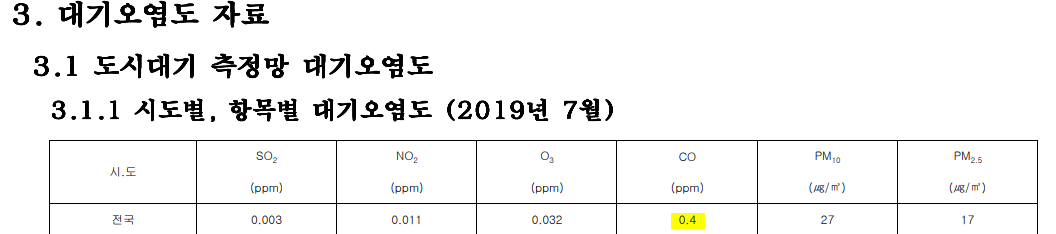

# 국립환경과학원 자료에서 7, 8월 CO 데이터의 평균(0.4)를 파악하여 7,8월 결측치에 0.4 대입

In [48]:
for i in range(1,6):
    df_air_raw.iloc[326,i] = (df_air_raw.iloc[325,i] + df_air_raw.iloc[327,i]) / 2

# 미세먼지 자료 등 326열에는 상당부분 비어있는데 해당 부분 앞뒤 자료 평균하여 삽입

In [49]:
df_air_raw.iloc[326,:]

MeasDate      2020-05-24
PM10                47.5
O3                  0.03
NO2               0.0285
CO                  0.55
SO2                0.003
TEMP               17.48
RAIN                1.45
WIND                2.85
WIND_DIR             257
HUMIDITY            83.3
ATM_PRESS          999.4
SNOW                   0
CLOUD               8.21
China_pm10            33
Season                 봄
Name: 326, dtype: object

In [50]:
df_air_raw['CO'].fillna(0.4, inplace = True)

In [51]:
df_air_raw.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO            0
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
China_pm10    0
Season        0
dtype: int64

In [52]:
df_air_raw[df_air_raw.isna().any(axis = 1)]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season


http://www.airkorea.or.kr/web/pastSearch?pMENU_NO=123

In [53]:
df_air_raw.iloc[:,1:]

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
0,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,38,여름
1,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,35,여름
2,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,38,여름
3,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,50,여름
4,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,58,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,39,여름
360,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,41,여름
361,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,45,여름
362,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,34,여름


In [54]:
type(df_air_raw.iloc[2:3,1:2])

pandas.core.frame.DataFrame

In [55]:
df_air_raw.dtypes

MeasDate       object
PM10          float64
O3            float64
NO2           float64
CO            float64
SO2           float64
TEMP          float64
RAIN          float64
WIND          float64
WIND_DIR        int64
HUMIDITY      float64
ATM_PRESS     float64
SNOW          float64
CLOUD         float64
China_pm10     object
Season         object
dtype: object

In [56]:
df_air_raw[df_air_raw.isna().any(axis = 1)]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season


In [57]:
df_air_raw.iloc[180:184,14]

180     73
181     66
182       
183     57
Name: China_pm10, dtype: object

In [58]:
df_air_raw.iloc[182,14] = (float(df_air_raw.iloc[181,14]) + float(df_air_raw.iloc[183,14])) / 2

In [59]:
df_air_raw.iloc[180:184,14]

180      73
181      66
182    61.5
183      57
Name: China_pm10, dtype: object

In [197]:
df_air_raw[df_air_raw['China_pm10'] == ' ']

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season


# 중간중간 결측치가 아닌 공백으로 되어 있는 자료가 있어 위, 아래 데이터 산술평균하여 대입

In [61]:
df_air_raw.iloc[272,14] = (float(df_air_raw.iloc[271,14]) + float(df_air_raw.iloc[273,14])) / 2

In [62]:
df_air_raw.iloc[270:274,14]

270     50
271     39
272     46
273     53
Name: China_pm10, dtype: object

In [63]:
df_air_raw['China_pm10'] = pd.to_numeric(df_air_raw['China_pm10'])

In [64]:
df_air_raw.dtypes

MeasDate       object
PM10          float64
O3            float64
NO2           float64
CO            float64
SO2           float64
TEMP          float64
RAIN          float64
WIND          float64
WIND_DIR        int64
HUMIDITY      float64
ATM_PRESS     float64
SNOW          float64
CLOUD         float64
China_pm10    float64
Season         object
dtype: object

In [67]:
df_air_raw['WIND_DIR'] = pd.to_numeric(df_air_raw['WIND_DIR'])

In [68]:
df_air_raw_plot = df_air_raw.drop('MeasDate',axis =1)

In [69]:
df_air_raw_plot.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
0,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38.0,여름
1,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35.0,여름
2,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38.0,여름
3,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50.0,여름
4,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58.0,여름


In [70]:
df_air_raw.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO            0
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
China_pm10    0
Season        0
dtype: int64

In [71]:
df_air_raw.columns

Index(['MeasDate', 'PM10', 'O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND',
       'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD', 'China_pm10',
       'Season'],
      dtype='object')

Index(['PM10', 'O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND', 'WIND_DIR',
       'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD', 'China_pm10', 'Season'],
      dtype='object')


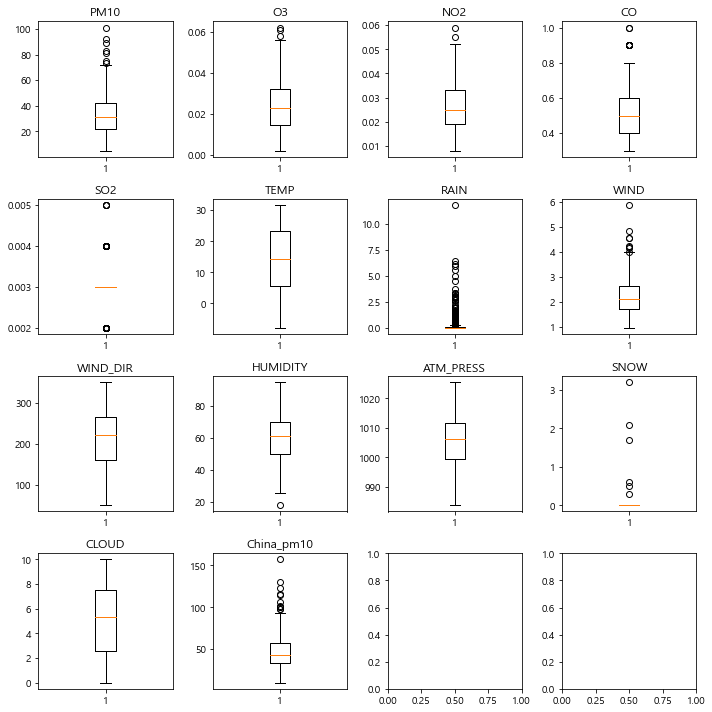

In [72]:
df_air_raw_temp = df_air_raw.drop('MeasDate', axis = 1)
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (10,10))
print(df_air_raw_temp.columns)
for i in range(1,5):
    for j in range(1,5):
        if i == 4 and j == 3:
            break
        else:
            axes[i-1][j-1].boxplot(df_air_raw_temp.iloc[:,4*(i-1)+j-1])
            axes[i-1][j-1].set_title(str(df_air_raw_temp.columns[4*(i-1)+j-1]))
plt.tight_layout()

In [73]:
df_air_raw[df_air_raw['PM10'] > 100]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
162,2019-12-10,101.0,0.01,0.055,1.0,0.004,8.12,0.85,1.22,148,80.6,1008.7,0.0,8.83,130.0,겨울


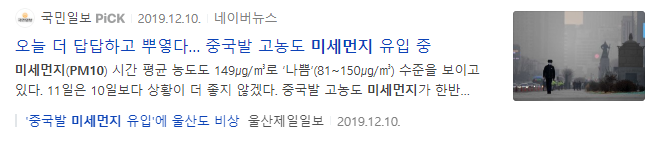

In [74]:
df_air_raw[df_air_raw['WIND'] > 4.5]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
68,2019-09-07,12.0,0.015,0.013,0.4,0.003,25.67,0.13,5.88,200,73.8,987.8,0.0,9.96,25.0,가을
209,2020-01-27,10.0,0.031,0.010,0.3,0.002,6.01,0.00,4.83,92,47.4,1010.9,0.0,9.50,27.0,겨울
261,2020-03-19,51.0,0.037,0.016,0.4,0.003,9.48,0.00,4.56,232,47.1,995.3,0.0,3.33,56.0,봄
293,2020-04-21,28.0,0.030,0.012,0.3,0.002,7.59,0.00,4.56,284,50.8,1003.6,0.0,4.42,40.0,봄


## Boxplot 사용하여 이상치 분석 수행. NO2, O3, CO, SO2 등 국립환경과학원 자료이며 실제 분석 보고서에서는 해당 이상치 보다 더 큰 값도 있어 분석 내 포함 결정

## 한국 미세먼지 자료의 경우 실제 뉴스에도 나와 분석 내 포함 결정

## 눈과 비 자료의 경우 데이터 부족하고 실제로 내릴 날짜가 적어 위와 같은 결과가 도출

([<matplotlib.axis.XTick at 0x23ab425acd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

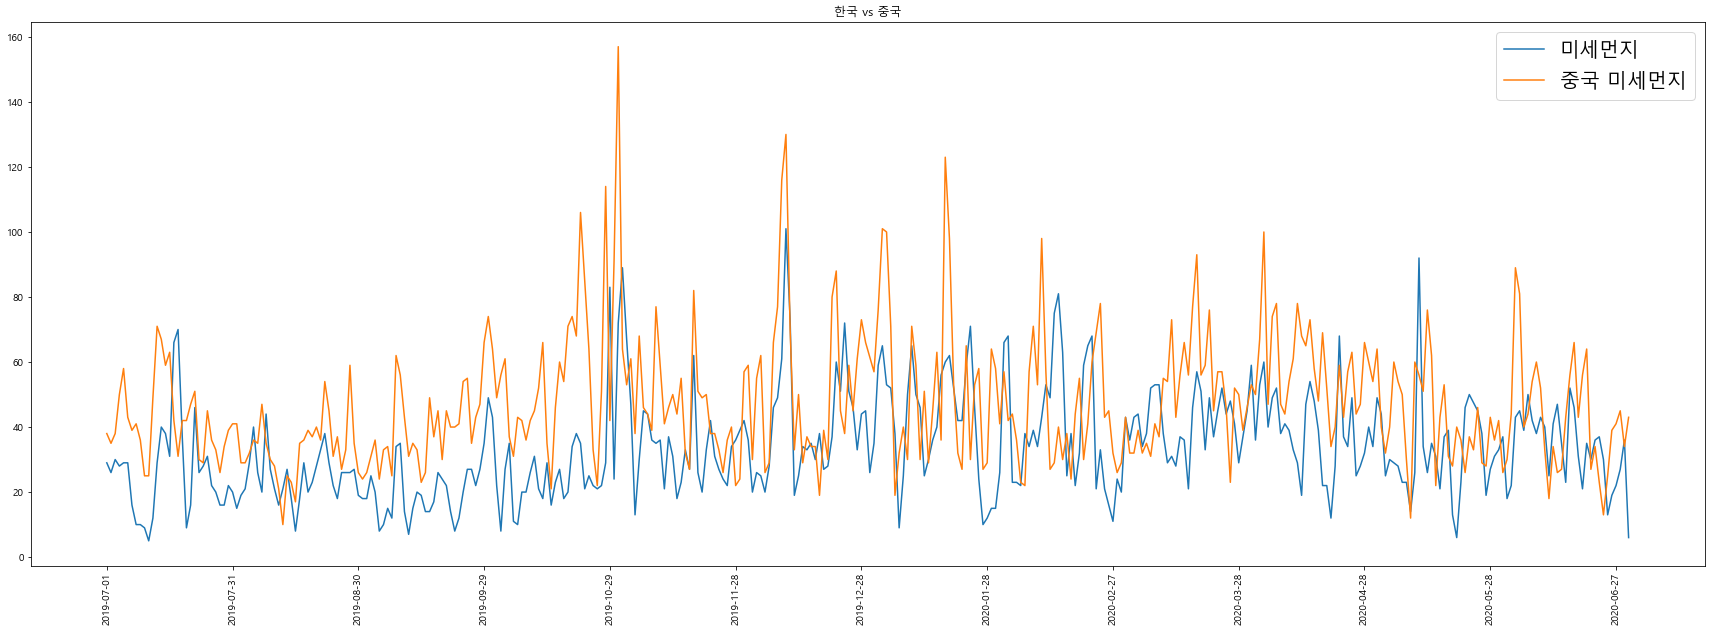

In [75]:
fig,ax = plt.subplots(figsize = (30,10))
plt.plot(df_air_raw['MeasDate'], df_air_raw['PM10'], label = '미세먼지')
plt.plot(df_air_raw['MeasDate'], df_air_raw['China_pm10'], label = '중국 미세먼지')
ax.set_title('한국 vs 중국')
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=2) 
plt.legend()
plt.xticks(df_air_raw['MeasDate'][::30],  rotation='vertical')

## 중국 및 한국 미세먼지 Trend Chart 분석 결과 상당 관련성이 높은 것을 볼 수 있다.

In [76]:
df_air_raw.columns

Index(['MeasDate', 'PM10', 'O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND',
       'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD', 'China_pm10',
       'Season'],
      dtype='object')

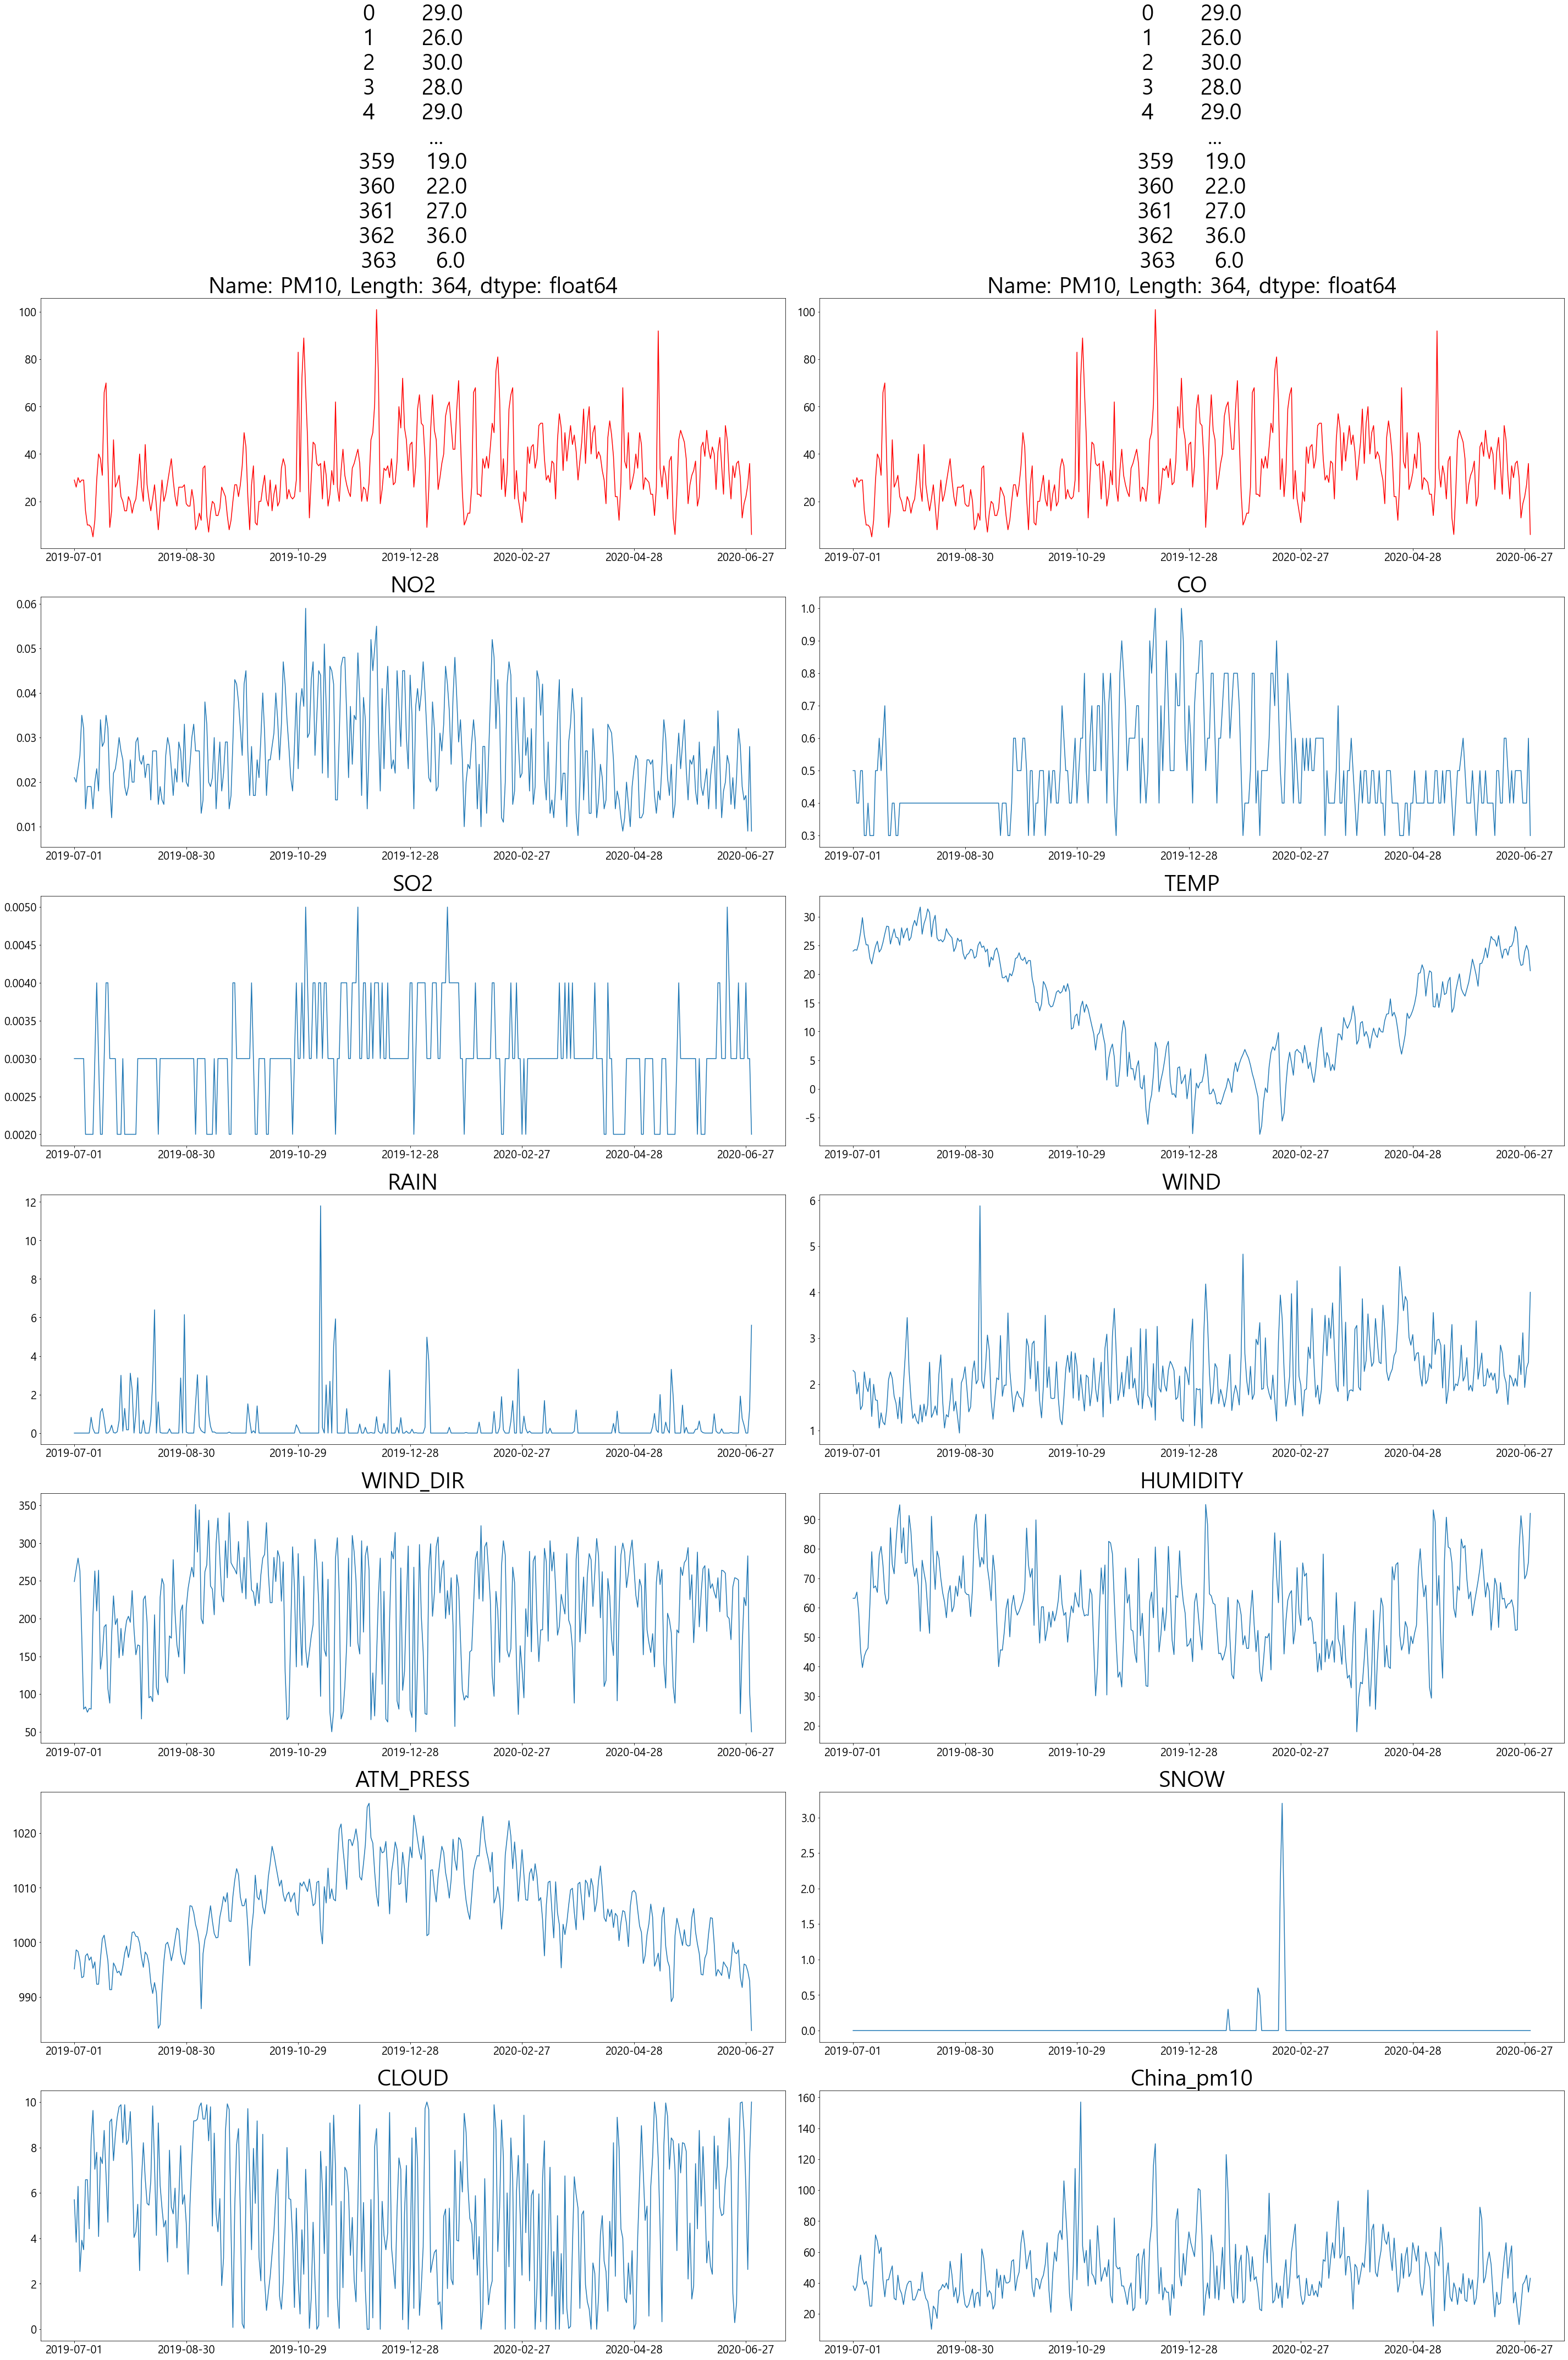

In [77]:
plt.subplots(7,2,figsize = (40,60))
plt.subplot(7,2,1)
plt.plot(df_air_raw['MeasDate'], df_air_raw['PM10'], 'r')
plt.xticks(df_air_raw['MeasDate'][::60])
plt.title(str(df_air_raw['PM10']), fontsize = 40)
plt.subplot(7,2,2)
plt.plot(df_air_raw['MeasDate'], df_air_raw['PM10'], 'r' )
plt.title(str(df_air_raw['PM10']), fontsize = 40)
plt.xticks(df_air_raw['MeasDate'][::60])
for i in range(1,13):
    plt.subplot(7,2,i+2)
    plt.plot(df_air_raw['MeasDate'], df_air_raw.iloc[:,i+2])
    plt.title(str(df_air_raw.columns[2+i]), fontsize = 40)
    plt.xticks(df_air_raw['MeasDate'][::60])
plt.tight_layout()

## 기타 변수들과의 분석 결과 No2, CO, SO2, Temp, Wind, Cloud와 관련 있는 것으로 판단. 특히, Temp와는 음의 관련성이 있는 것으로 판단됨

In [78]:
df_air_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38.0,여름
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35.0,여름
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38.0,여름
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50.0,여름
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58.0,여름


In [79]:
df_air_raw_y = df_air_raw['PM10']
df_air_raw_x = df_air_raw.drop(['PM10', "MeasDate",'Season'], axis =1, inplace = False)

In [80]:
df_air_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10,Season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38.0,여름
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35.0,여름
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38.0,여름
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50.0,여름
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58.0,여름


In [81]:
df_air_raw_x.columns

Index(['O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND', 'WIND_DIR',
       'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD', 'China_pm10'],
      dtype='object')

In [84]:
model = LinearRegression()
for n_sel in [5,6,7]:
    rfe = RFE(estimator = model, n_features_to_select = n_sel).fit(df_air_raw_x, df_air_raw_y)
    selected_cols = df_air_raw_x.columns[rfe.support_]
    print('Selected Variables : {}'.format(selected_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'WIND'], dtype='object')
Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND'], dtype='object')
Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND', 'SNOW'], dtype='object')


## 후진제거법 사용하여 주요 변수 3가지 경우(5,6,7개)에 대해서 추출 결과 위와 같은 자료 도출. O3, NO2, CO, SO2는 전부 포함되어 있어 상당히 높은 선형관계가 있다고 판단됨

In [85]:
df_air_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10
PM10,1.000,-0.050,0.395,0.614,0.426,-0.308,-0.118,-0.097,0.021,-0.143,0.250,-0.020,-0.167,0.408
O3,-0.050,1.000,-0.591,-0.517,-0.234,0.515,-0.103,0.168,0.269,-0.034,-0.534,0.003,-0.117,-0.057
NO2,0.395,-0.591,1.000,0.792,0.562,-0.236,0.031,-0.536,-0.408,-0.062,0.419,-0.121,0.020,0.268
CO,0.614,-0.517,0.792,1.000,0.596,-0.472,-0.011,-0.340,-0.301,-0.034,0.474,-0.042,-0.034,0.307
SO2,0.426,-0.234,0.562,0.596,1.000,-0.273,-0.128,-0.252,-0.094,-0.297,0.333,-0.103,-0.186,0.263
TEMP,-0.308,0.515,-0.236,-0.472,-0.273,1.000,0.078,-0.214,-0.050,0.407,-0.792,-0.185,0.345,-0.220
RAIN,-0.118,-0.103,0.031,-0.011,-0.128,0.078,1.000,0.128,-0.181,0.399,-0.237,0.019,0.360,-0.105
WIND,-0.097,0.168,-0.536,-0.340,-0.252,-0.214,0.128,1.000,0.237,-0.084,-0.057,0.146,0.015,-0.018
WIND_DIR,0.021,0.269,-0.408,-0.301,-0.094,-0.050,-0.181,0.237,1.000,-0.095,0.067,0.108,-0.295,-0.014
HUMIDITY,-0.143,-0.034,-0.062,-0.034,-0.297,0.407,0.399,-0.084,-0.095,1.000,-0.514,0.021,0.626,-0.150


## 상관분석 결과 O3, NO2, CO,SO2, TEMP, China 자료들이 0.4(절대값) 이상으로 영향 변수 후보로 선정

In [100]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_air_raw_x, df_air_raw_y)
print(tree_uncustomized.feature_importances_)
v_feature_name = df_air_raw_x.columns
dt_importance = pd.DataFrame()
dt_importance['Feature'] = v_feature_name
dt_importance['Importance'] = tree_uncustomized.feature_importances_
dt_importance.sort_values('Importance', ascending = False, inplace = True)
dt_importance.round(3)

[0.13969223 0.02697139 0.3534627  0.00523479 0.06911251 0.04709882
 0.04373293 0.03953438 0.06293522 0.05330268 0.         0.06251326
 0.09640908]


,Feature,Importance
2,CO,0.353
0,O3,0.140
12,China_pm10,0.096
4,TEMP,0.069
8,HUMIDITY,0.063
11,CLOUD,0.063
9,ATM_PRESS,0.053
5,RAIN,0.047
6,WIND,0.044
7,WIND_DIR,0.040


## Decision Tree 확인 결과이며 0.05 이상 자료를 중요 변수 후보로 선정

In [99]:
rt_uncustomized = RandomForestRegressor(random_state = 1234)
rt_uncustomized.fit(df_air_raw_x, df_air_raw_y)
print(rt_uncustomized.feature_importances_)
v_feature_name = df_air_raw_x.columns
rt_importance = pd.DataFrame()
rt_importance['Feature'] = v_feature_name
rt_importance['Importance'] = rt_uncustomized.feature_importances_
rt_importance.sort_values('Importance', ascending = False, inplace = True)
rt_importance.round(3)

[1.11908938e-01 4.10521333e-02 3.85588784e-01 1.64936900e-02
 5.18856368e-02 2.30058588e-02 6.05618977e-02 5.16943196e-02
 4.79808886e-02 4.02853345e-02 3.84314000e-04 6.03481748e-02
 1.08810031e-01]


,Feature,Importance
2,CO,0.386
0,O3,0.112
12,China_pm10,0.109
6,WIND,0.061
11,CLOUD,0.060
4,TEMP,0.052
7,WIND_DIR,0.052
8,HUMIDITY,0.048
1,NO2,0.041
9,ATM_PRESS,0.040


## Random Forest 결과이며 0.05 이상 자료를 중요 변수 후보로 선정

In [98]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_air_raw_x, df_air_raw_y)
print(gb_uncustomized.feature_importances_)
v_feature_name = df_air_raw_x.columns
gb_importance = pd.DataFrame()
gb_importance['Feature'] = v_feature_name
gb_importance['Importance'] = gb_uncustomized.feature_importances_
gb_importance.sort_values('Importance', ascending = False, inplace = True)
gb_importance.round(3)

[0.15214325 0.03668873 0.41458065 0.00599997 0.07548466 0.02291112
 0.03655428 0.04683694 0.03745884 0.01648354 0.         0.0475614
 0.10729662]


,Feature,Importance
2,CO,0.415
0,O3,0.152
12,China_pm10,0.107
4,TEMP,0.075
11,CLOUD,0.048
7,WIND_DIR,0.047
8,HUMIDITY,0.037
1,NO2,0.037
6,WIND,0.037
5,RAIN,0.023


## GradientBoosting 결과이며 0.05 이상 자료를 중요 변수 후보로 선정

## 최종 결과 O3, CO, SO2, WIND, China_pm10을 중요 변수로 결정

In [89]:
df_ana_raw = df_air_raw[['PM10','O3','CO','SO2','WIND','China_pm10']]

In [91]:
df_ana_raw.corr().round(3)

,PM10,O3,CO,SO2,WIND,China_pm10
PM10,1.000,-0.050,0.614,0.426,-0.097,0.408
O3,-0.050,1.000,-0.517,-0.234,0.168,-0.057
CO,0.614,-0.517,1.000,0.596,-0.340,0.307
SO2,0.426,-0.234,0.596,1.000,-0.252,0.263
WIND,-0.097,0.168,-0.340,-0.252,1.000,-0.018
China_pm10,0.408,-0.057,0.307,0.263,-0.018,1.000


In [92]:
df_ana_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM10        364 non-null    float64
 1   O3          364 non-null    float64
 2   CO          364 non-null    float64
 3   SO2         364 non-null    float64
 4   WIND        364 non-null    float64
 5   China_pm10  364 non-null    float64
dtypes: float64(6)
memory usage: 29.9 KB


In [94]:
df_ana_raw

,PM10,O3,CO,SO2,WIND,China_pm10
0,29.0,0.054,0.5,0.003,2.30,38.0
1,26.0,0.053,0.5,0.003,2.26,35.0
2,30.0,0.042,0.4,0.003,1.79,38.0
3,28.0,0.034,0.4,0.003,2.04,50.0
4,29.0,0.045,0.5,0.003,1.45,58.0
...,...,...,...,...,...,...
359,19.0,0.039,0.4,0.003,3.12,39.0
360,22.0,0.044,0.4,0.004,1.93,41.0
361,27.0,0.044,0.4,0.003,2.35,45.0
362,36.0,0.026,0.6,0.003,2.48,34.0


In [101]:
reg_model = smf.ols(formula = 'PM10 ~ O3+CO+SO2+WIND+China_pm10', data = df_ana_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     78.68
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.61e-55
Time:                        04:42:31   Log-Likelihood:                -1389.4
No. Observations:                 364   AIC:                             2791.
Df Residuals:                     358   BIC:                             2814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.3874      4.626     -7.218      0.0

## 회귀분석 결과이며 R^2 = 0.517로 준수하고 p-value의 경우 SO2 외에 전부 0.05 이하로 유의미하다는 결론 추정

In [104]:
df_ana_raw_x = df_ana_raw.drop('PM10', axis = 1)
df_ana_raw_x_const = sm.add_constant(df_ana_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_ana_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_ana_raw_x_const.values , i) for i in range(df_ana_raw_x_const.shape[1])]
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
5,China_pm10,1.144
4,WIND,1.148
1,O3,1.399
3,SO2,1.591
2,CO,2.255
0,const,63.280


In [107]:
df_air_raw_x.head()

,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,China_pm10
0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,38.0
1,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,35.0
2,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,38.0
3,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,50.0
4,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,58.0


In [124]:
df_ana_raw_y = df_ana_raw['PM10']
df_ana_raw_x = df_ana_raw.drop('PM10', axis = 1, inplace = False)

In [125]:
df_ana_raw_x

,O3,CO,SO2,WIND,China_pm10
0,0.054,0.5,0.003,2.30,38.0
1,0.053,0.5,0.003,2.26,35.0
2,0.042,0.4,0.003,1.79,38.0
3,0.034,0.4,0.003,2.04,50.0
4,0.045,0.5,0.003,1.45,58.0
...,...,...,...,...,...
359,0.039,0.4,0.003,3.12,39.0
360,0.044,0.4,0.004,1.93,41.0
361,0.044,0.4,0.003,2.35,45.0
362,0.026,0.6,0.003,2.48,34.0


In [126]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_ana_raw_x, df_ana_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (254, 5)
train data Y size : (254,)
test data X size : (110, 5)
test data Y size : (110,)


In [128]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.014


## Minus Score은 처음봅니다...

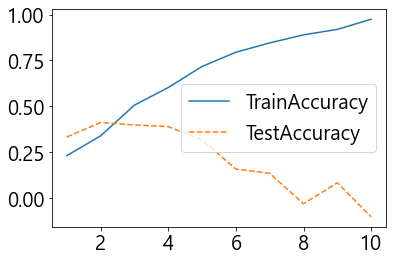

In [136]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['DifAccuracy'] = df_accuracy_depth['TrainAccuracy'] - df_accuracy_depth['TestAccuracy']

plt.plot(para_depth, train_accuracy, linestyle='-', label = 'TrainAccuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label = 'TestAccuracy')
plt.legend()

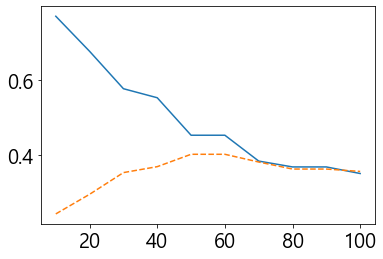

In [147]:
train_accuracy = []; test_accuracy = []
para_split = [n_split *10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_split = v_min_samples_split, max_depth = 8, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['DifAccuracy'] = df_accuracy_split['TrainAccuracy'] - df_accuracy_split['TestAccuracy']

plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')

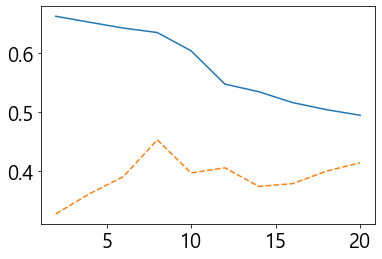

In [148]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(min_samples_split = 20, max_depth = 8, 
                                  min_samples_leaf = v_min_samples_leaf, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf['DifAccuracy'] = df_accuracy_leaf['TrainAccuracy'] - df_accuracy_leaf['TestAccuracy']

plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')

In [149]:
tree_final = DecisionTreeRegressor(max_depth = 6, min_samples_split = 20, min_samples_leaf = 8, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.629
Score on test set: 0.449


## Decision Tree 학습 결과 train : 0.629, test : 0.449 로 아쉬운 결과 도출이나 기존 Minus Score을 비교했을 때 큰 발전을 이룸

In [199]:
train_accuracy = []; test_accuracy = []
tree_final = DecisionTreeRegressor(max_depth = 6, min_samples_split = 20, min_samples_leaf = 8, random_state = 1234)
for i in range(100):
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_ana_raw_x, df_ana_raw_y, test_size = 0.3)
    tree_final.fit(df_train_x, df_train_y)
    tree_test = pd.DataFrame()
    train_accuracy.append(tree_final.score(df_train_x, df_train_y))

tree_test['test score'] = train_accuracy
aa = np.mean(tree_test['test score'])
print('Max : {:.3f}'.format(max(tree_test['test score'])))
print('Min : {:.3f}'.format(min(tree_test['test score'])))
print('Mean : {:.3f}'.format(aa))

Max : 0.693
Min : 0.545
Mean : 0.619


## 전체 데이터에서 Random하게 70% 100번 추출하여 tree_final(Decision Tree 최종 모델)을 사용하여 자체 검증 결과 기존보다 훨씬 높은 수치를 얻어 Training이 과적합됬다고 판단됨. 

## 평균 0.619면 상당히 준수한 결과로 판단됨.

In [245]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.937
Accuracy on test set : 0.244


   n_estimators  TrainAccuracy  TestAccuracy  DifAccuracy
0             1          0.724         0.025        0.699
1             2          0.807         0.241        0.565
2             3          0.848         0.393        0.455
3             4          0.878         0.375        0.503
4             5          0.898         0.360        0.537
5             6          0.906         0.343        0.563
6             7          0.912         0.346        0.565
7             8          0.912         0.366        0.546
8             9          0.919         0.378        0.541


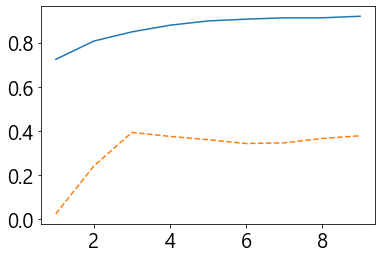

In [154]:
train_accuracy = []; test_accuracy = []
para_n_tree= [n_tree for n_tree in range(1, 10)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['DifAccuracy'] = df_accuracy_n['TrainAccuracy'] - df_accuracy_n['TestAccuracy']

print(df_accuracy_n.round(3))
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')

   depth  TrainAccuracy  TestAccuracy  DifAccuracy
0      1          0.280         0.356       -0.076
1      2          0.412         0.462       -0.050
2      3          0.522         0.436        0.087
3      4          0.625         0.408        0.218
4      5          0.703         0.416        0.287
5      6          0.759         0.402        0.357
6      7          0.777         0.410        0.367
7      8          0.803         0.421        0.382
8      9          0.823         0.362        0.461
9     10          0.848         0.374        0.474


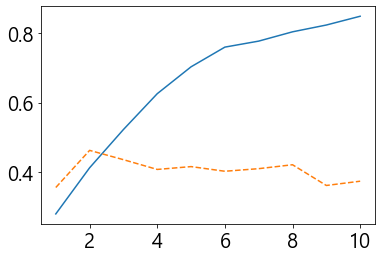

In [155]:
train_accuracy = []; test_accuracy = []
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 3, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['DifAccuracy'] = df_accuracy_depth['TrainAccuracy'] - df_accuracy_depth['TestAccuracy']

print(df_accuracy_depth.round(3))
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')

   split  TrainAccuracy  TestAccuracy  DifAccuracy
0      2          0.803         0.421        0.382
1      3          0.804         0.403        0.401
2      4          0.781         0.439        0.342
3      5          0.771         0.434        0.337
4      6          0.771         0.436        0.336
5      7          0.761         0.451        0.310
6      8          0.732         0.435        0.297
7      9          0.724         0.450        0.274
8     10          0.704         0.444        0.260


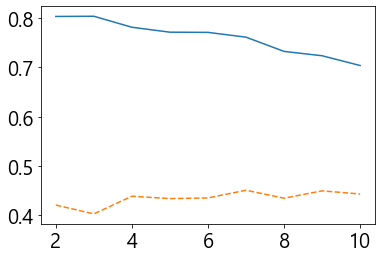

In [160]:
train_accuracy = []; test_accuracy = []
para_split= [n_split for n_split in range(2,11)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 3, max_depth = 8, min_samples_split = v_min_samples_split,random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['DifAccuracy'] = df_accuracy_split['TrainAccuracy'] - df_accuracy_split['TestAccuracy']

print(df_accuracy_split.round(3))
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')

   leaf  TrainAccuracy  TestAccuracy  DifAccuracy
0     1          0.803         0.421        0.382
1     2          0.720         0.443        0.277
2     3          0.711         0.475        0.236
3     4          0.655         0.466        0.190
4     5          0.641         0.493        0.147
5     6          0.625         0.472        0.153
6     7          0.601         0.452        0.150
7     8          0.572         0.457        0.115
8     9          0.567         0.428        0.139
9    10          0.555         0.433        0.122


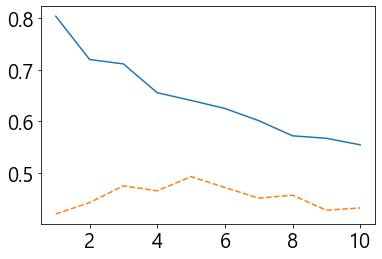

In [161]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf  for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 3, max_depth = 8, min_samples_split = 2, min_samples_leaf = v_min_samples_leaf, 
                               random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf['DifAccuracy'] = df_accuracy_leaf['TrainAccuracy'] - df_accuracy_leaf['TestAccuracy']

print(df_accuracy_leaf.round(3))
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')

In [164]:
rf_final = RandomForestRegressor(n_estimators = 3, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, 
                               random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.711
Score on test set: 0.475


## RF도 기존 Minus Score이였으나 Hyper parameter 조정을 통해 크게 향상됨

In [200]:
train_accuracy = []; test_accuracy = []
rf_final = RandomForestRegressor(n_estimators = 3, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, 
                               random_state = 1234)
for i in range(100):
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_ana_raw_x, df_ana_raw_y, test_size = 0.3)
    rf_final.fit(df_train_x, df_train_y)
    tree_test = pd.DataFrame()
    train_accuracy.append(rf_final.score(df_train_x, df_train_y))

tree_test['test score'] = train_accuracy
aa = np.mean(tree_test['test score'])
print('Max : {:.3f}'.format(max(tree_test['test score'])))
print('Min : {:.3f}'.format(min(tree_test['test score'])))
print('Mean : {:.3f}'.format(aa))

Max : 0.807
Min : 0.517
Mean : 0.704


## 하지만 위 Final 자료도 이와 같이 100번 반복 수행하여 확인결과 과적합된 것을 확인 가능

In [165]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.891
Score on test set: 0.446


    n_estimators  TrainAccuracy  TestAccuracy  DifAccuracy
0             10          0.518         0.407        0.112
1             20          0.660         0.468        0.192
2             30          0.720         0.488        0.233
3             40          0.760         0.492        0.268
4             50          0.784         0.495        0.290
5             60          0.807         0.491        0.316
6             70          0.822         0.488        0.334
7             80          0.859         0.467        0.392
8             90          0.876         0.458        0.418
9            100          0.891         0.446        0.445
10           110          0.898         0.443        0.455
11           120          0.909         0.434        0.475
12           130          0.915         0.435        0.480
13           140          0.925         0.431        0.494


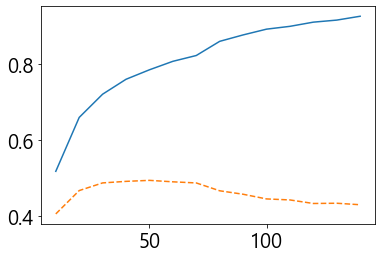

In [168]:
train_accuracy = []; test_accuracy = []
para_n_tree= [n_tree * 10 for n_tree in range(1, 15)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['DifAccuracy'] = df_accuracy_n['TrainAccuracy'] - df_accuracy_n['TestAccuracy']

print(df_accuracy_n.round(3))
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')

   depth  TrainAccuracy  TestAccuracy  DifAccuracy
0      1          0.397         0.366        0.031
1      2          0.593         0.463        0.130
2      3          0.720         0.488        0.233
3      4          0.823         0.477        0.345
4      5          0.911         0.404        0.507
5      6          0.962         0.311        0.651
6      7          0.983         0.256        0.727
7      8          0.990         0.172        0.817
8      9          0.995         0.141        0.854
9     10          0.997         0.077        0.919


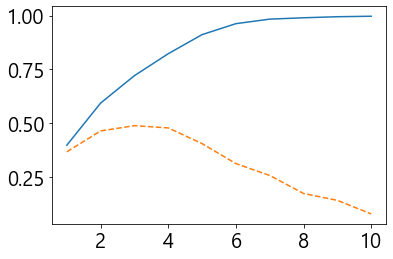

In [169]:
train_accuracy = []; test_accuracy = []
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 30, max_depth = v_max_depth, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['DifAccuracy'] = df_accuracy_depth['TrainAccuracy'] - df_accuracy_depth['TestAccuracy']

print(df_accuracy_depth.round(3))
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')

   split  TrainAccuracy  TestAccuracy  DifAccuracy
0      2          0.823         0.477        0.345
1      3          0.825         0.457        0.367
2      4          0.830         0.449        0.381
3      5          0.824         0.466        0.358
4      6          0.831         0.456        0.374
5      7          0.822         0.474        0.349
6      8          0.818         0.483        0.335
7      9          0.819         0.470        0.349
8     10          0.807         0.471        0.335


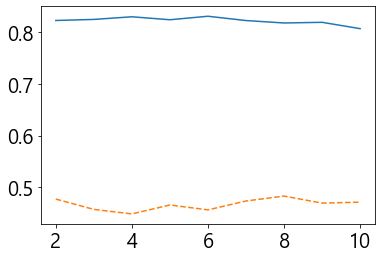

In [170]:
train_accuracy = []; test_accuracy = []
para_split= [n_split for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 30, max_depth = 4, min_samples_split = v_min_samples_split,random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['DifAccuracy'] = df_accuracy_split['TrainAccuracy'] - df_accuracy_split['TestAccuracy']

print(df_accuracy_split.round(3))
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')

   leaf  TrainAccuracy  TestAccuracy  DifAccuracy
0     1          0.818         0.483        0.335
1     2          0.804         0.484        0.320
2     3          0.806         0.483        0.323
3     4          0.792         0.492        0.300
4     5          0.784         0.489        0.295
5     6          0.782         0.473        0.309
6     7          0.768         0.486        0.282
7     8          0.760         0.484        0.276
8     9          0.744         0.493        0.252
9    10          0.741         0.483        0.258


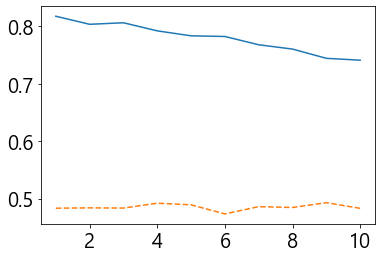

In [171]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf  for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 30, max_depth = 4, min_samples_split = 8, min_samples_leaf = v_min_samples_leaf, 
                               random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf['DifAccuracy'] = df_accuracy_leaf['TrainAccuracy'] - df_accuracy_leaf['TestAccuracy']

print(df_accuracy_leaf.round(3))
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')

In [172]:
gb_final = GradientBoostingRegressor(n_estimators = 30, max_depth = 4, min_samples_split = 8, min_samples_leaf = 2, 
                               random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.804
Score on test set: 0.484


## GradientBoosting은 유일하게 초기 결과가 0.446(Test)로 준수하게 시작하였으나 최종 모델에서는 0.484로 크게 향상되지 않음

In [203]:
train_accuracy = []; test_accuracy = []
gb_final = GradientBoostingRegressor(n_estimators = 30, max_depth = 4, min_samples_split = 8, min_samples_leaf = 2, random_state = 1234)
for i in range(100):
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_ana_raw_x, df_ana_raw_y, test_size = 0.3)
    gb_final.fit(df_train_x, df_train_y)
    gb_test = pd.DataFrame()
    train_accuracy.append(gb.score(df_train_x, df_train_y))

gb_test['test score'] = train_accuracy
aa = np.mean(gb_test['test score'])
print('Max : {:.3f}'.format(max(gb_test['test score'])))
print('Min : {:.3f}'.format(min(gb_test['test score'])))
print('Mean : {:.3f}'.format(aa))

Max : 0.712
Min : 0.589
Mean : 0.650


## 하지만 똑같이 반복 검증 결과 0.650으로 크게 향상됨. 이런 검증 방법을 통해서는 RF가 0.704로 가장 좋은 결과 도출

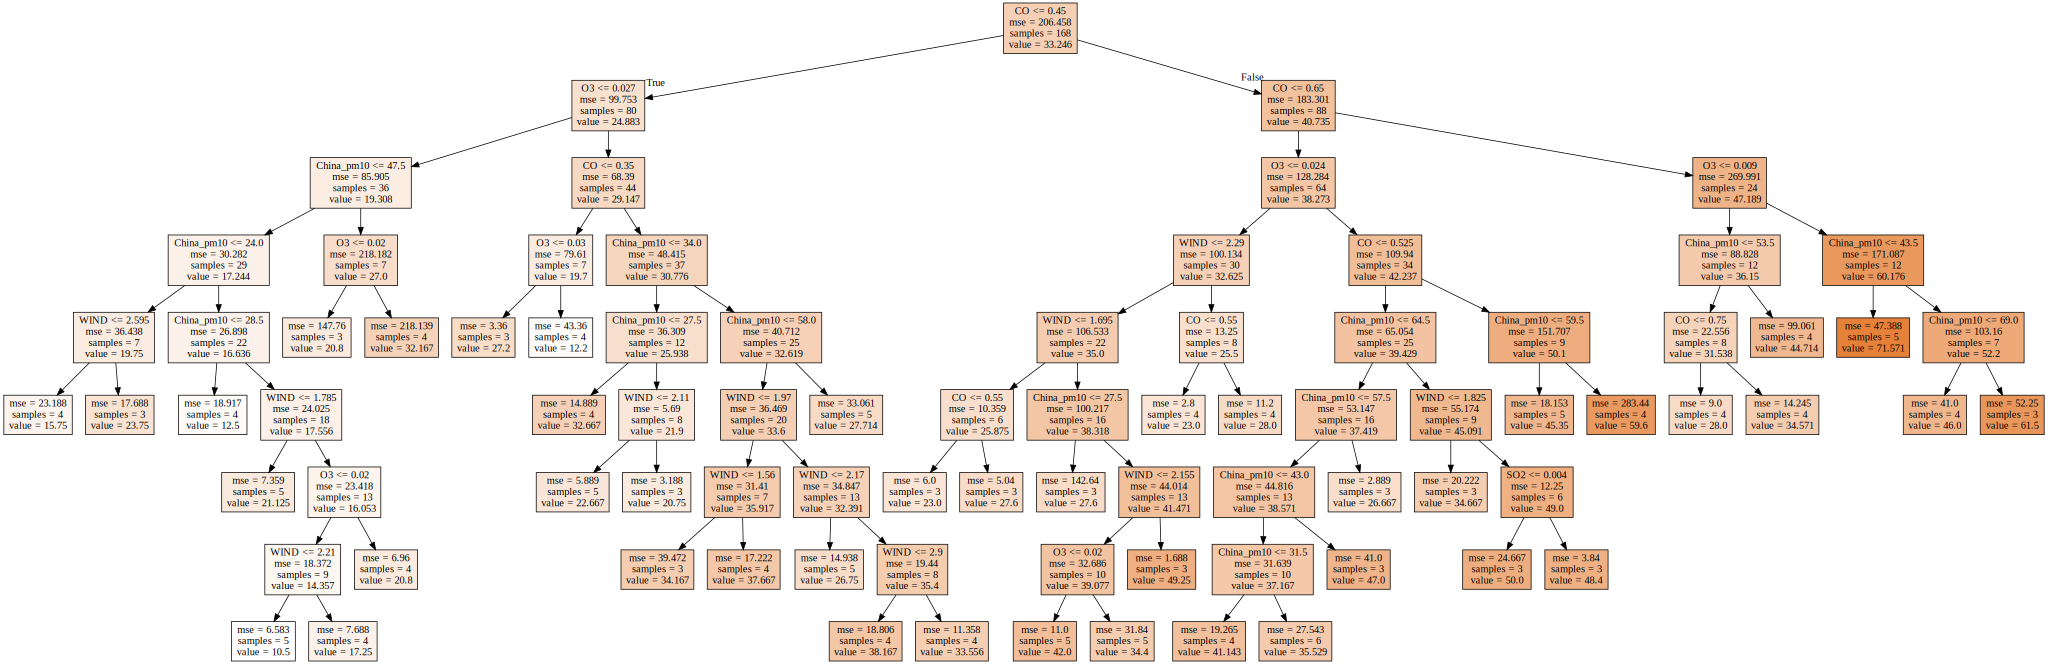

In [208]:
export_graphviz(rf_final.estimators_[0], out_file = 'rfr_final.dot', feature_names=df_ana_raw_x.columns, impurity = True, filled = True)
with open('rfr_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [214]:
df_ana_raw_x.columns

Index(['O3', 'CO', 'SO2', 'WIND', 'China_pm10'], dtype='object')

Text(0, 0.5, '변수')

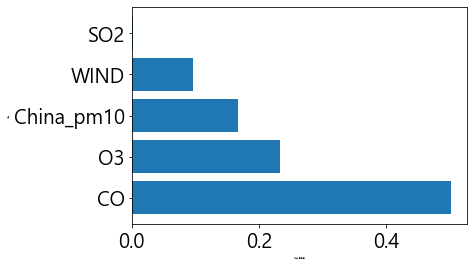

In [213]:

v_feature_name = df_air_raw_x.columns
rt_importance = pd.DataFrame()
rt_importance['Feature'] = df_ana_raw_x.columns
rt_importance['Importance'] = rf_final.feature_importances_
rt_importance.sort_values('Importance', ascending = False, inplace = True)
coordinates = range(len(rt_importance))
plt.barh(y = coordinates, width = rt_importance['Importance'])
plt.yticks(coordinates, rt_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

## 변수 중요도는 위와 같다. CO가 가장 중요한 변수인 것을 확인할 수 있다.

In [215]:
real_wind = pd.read_csv('wind_data.csv', engine = 'python', encoding = 'CP949')

In [217]:
real_other = pd.read_csv('data111.csv', engine = 'python', encoding = 'CP949')

In [229]:
real_wei = pd.read_csv('weiwei.csv', engine = 'python', encoding = 'CP949')

In [221]:
real_wind1 = pd.DataFrame()
real_wind1['날짜'] = real_wind['일시']
real_wind1['풍속'] = real_wind['평균 풍속(m/s)']

In [230]:
real_wei.head()

,pm10
0,54
1,67
2,34
3,43
4,26


In [222]:
real_wind1.head()

,날짜,풍속
0,2020-07-01,1.9
1,2020-07-02,1.9
2,2020-07-03,2.6
3,2020-07-04,2.1
4,2020-07-05,1.9


In [218]:
real_other = real_other[1:]

In [224]:
real_other['풍속'] = real_wind['평균 풍속(m/s)']

In [231]:
real_other['China'] = real_wei

In [247]:
real_other.head(10)

,날짜,PM10,PM2.5,O3,NO2,CO,SO2,WIND,China_pm10
1,2020-07-01,20,14,0.027,0.021,0.4,0.003,1.9,67
2,2020-07-02,52,41,0.051,0.022,0.6,0.004,2.6,34
3,2020-07-03,39,31,0.035,0.022,0.5,0.003,2.1,43
4,2020-07-04,19,16,0.043,0.014,0.3,0.003,1.9,26
5,2020-07-05,27,25,0.05,0.013,0.4,0.003,2.1,20
6,2020-07-06,22,18,0.044,0.017,0.4,0.003,2.5,28
7,2020-07-07,13,11,0.036,0.012,0.3,0.002,2.0,45
8,2020-07-08,26,20,0.036,0.018,0.4,0.003,1.7,46
9,2020-07-09,42,31,0.039,0.026,0.6,0.003,2.8,34
10,2020-07-10,13,10,0.031,0.015,0.4,0.003,2.6,50


In [246]:
real_other.tail(10)

,날짜,PM10,PM2.5,O3,NO2,CO,SO2,WIND,China_pm10
112,2020-10-22,81,34,0.02,0.025,0.5,0.003,1.9,77
113,2020-10-23,30,10,0.024,0.012,0.3,0.003,2.8,69
114,2020-10-24,30,12,0.022,0.018,0.4,0.003,3.0,38
115,2020-10-25,34,16,0.018,0.031,0.5,0.003,2.5,44
116,2020-10-26,61,31,0.022,0.04,0.6,0.003,1.7,63
117,2020-10-27,91,54,0.025,0.042,0.7,0.004,1.6,72
118,2020-10-28,52,24,0.031,0.017,0.4,0.003,1.8,82
119,2020-10-29,41,16,0.02,0.028,0.4,0.003,2.5,52
120,2020-10-30,51,21,0.011,0.04,0.6,0.003,2.0,38
121,2020-10-31,33,15,0.022,0.028,0.4,0.003,1.5,50


In [234]:
test_data_y = real_other['PM10']
test_data_x = real_other.drop(['날짜','PM10','PM2.5'], axis = 1)

In [235]:
real_other.head()

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,풍속,China
1,2020-07-01,20,14,0.027,0.021,0.4,0.003,1.9,67
2,2020-07-02,52,41,0.051,0.022,0.6,0.004,2.6,34
3,2020-07-03,39,31,0.035,0.022,0.5,0.003,2.1,43
4,2020-07-04,19,16,0.043,0.014,0.3,0.003,1.9,26
5,2020-07-05,27,25,0.05,0.013,0.4,0.003,2.1,20


In [236]:
real_other.columns

Index(['날짜', 'PM10', 'PM2.5', '오 존', '이산화질소', '일산화탄소', '아황산가스', '풍속', 'China'], dtype='object')

In [239]:
real_other.rename(columns={'오 존' : 'O3', '이산화질소' : 'NO2', '일산화탄소' : 'CO', '아황산가스' : 'SO2', '풍속' : 'WIND',
                          'China' : 'China_pm10'}, inplace = True)

In [240]:
real_other.head()

,날짜,PM10,PM2.5,O3,NO2,CO,SO2,WIND,China_pm10
1,2020-07-01,20,14,0.027,0.021,0.4,0.003,1.9,67
2,2020-07-02,52,41,0.051,0.022,0.6,0.004,2.6,34
3,2020-07-03,39,31,0.035,0.022,0.5,0.003,2.1,43
4,2020-07-04,19,16,0.043,0.014,0.3,0.003,1.9,26
5,2020-07-05,27,25,0.05,0.013,0.4,0.003,2.1,20


In [241]:
test_data_y = real_other['PM10']
test_data_x = real_other.drop(['날짜','PM10','PM2.5'], axis = 1)

In [242]:
test_data_y.head()

1    20
2    52
3    39
4    19
5    27
Name: PM10, dtype: object

In [243]:
test_data_x.head()

,O3,NO2,CO,SO2,WIND,China_pm10
1,0.027,0.021,0.4,0.003,1.9,67
2,0.051,0.022,0.6,0.004,2.6,34
3,0.035,0.022,0.5,0.003,2.1,43
4,0.043,0.014,0.3,0.003,1.9,26
5,0.05,0.013,0.4,0.003,2.1,20


In [244]:
rf_final = RandomForestRegressor(n_estimators = 3, max_depth = 8, min_samples_split = 2, min_samples_leaf = 3, 
                               random_state = 1234)
rf_final.fit(test_data_x, test_data_y)
print('실제 자료 검증 결과 : {:.3f}'.format((rf_final.score(test_data_x, test_data_y))))


실제 자료 검증 결과 : 0.768
